# Summary
This Script pulls data from the pilot

In [1]:
# load libraries and initialize database cursor
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = pymysql.connect(
    host="thirdtest.camwsondhmqr.us-east-2.rds.amazonaws.com",
    user="thirdtest",
    passwd="Qja1998+0325",
    db="ebdb"
)
cursor = conn.cursor()

In [2]:
# pull data from database and print user data
cursor.execute('SELECT * FROM user');
rows = cursor.fetchall()

df_users = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_users.rename(
    columns={0:'Name', 1:'Political Stance', 2:'Session', 3:'Question Order', 4:'Current Question', 5:'World'},
    inplace=True
)
#df_users = df_users.sort_values(['Name'], ascending=[1])
df_users['Turn'] = range(1,len(df_users)+1)
df_users = df_users[['Turn','Name','Political Stance','Session', 'Question Order', 'World']]
df_users

,Turn,Name,Political Stance,Session,Question Order,World
0,1,A19L8SNH73AX1Z,Republicans,5b8b4044824d7,"23,24,14,6,2,18,21,13,12,8,3,5,20,15,7,4,22,1,...",2
1,2,AEO8NL8D28NQG,strong Democrats,5b8b4d86a9b32,"23,24,2,4,18,7,21,10,8,9,3,14,17,6,12,11,22,19...",2
2,3,A3302168IZJTMX,Democrats,5b8b568322aea,"23,24,3,7,20,9,21,17,6,16,12,10,1,8,19,4,22,5,...",2
3,4,A2A14Q1JLWW6R1,strong Democrats,5b8b7fcb9fc24,"23,24,20,17,10,12,21,5,9,14,6,15,13,8,16,3,22,...",2
4,5,A10G0V9R0U5OR,Democrats,5b8b863661d5f,"23,24,2,18,12,20,21,7,3,19,8,15,6,13,14,5,22,9...",2
5,6,A1DNJ17PE2RYJZ,strong Democrats,5b8e7e835809d,"23,24,7,5,11,18,21,9,1,6,20,10,14,2,16,15,22,3...",2
6,7,A2EZNZ6X58RTNR,strong Republicans,5b8ea5bc5b8b2,"23,24,4,7,19,12,21,5,13,14,18,17,9,1,11,3,22,2...",2
7,8,A2EKR2ZFO10VMV,strong Democrats,5b8eb41f294fa,"23,24,12,8,3,17,21,6,16,7,10,11,18,2,9,1,22,20...",2
8,9,A1CA46R2A6TV9W,Democrats,5b8eb7d8c8f49,"23,24,12,3,17,15,21,2,20,18,13,16,10,19,8,4,22...",2
9,10,A326WOXXK2ZPM3,strong Republicans,5b8ec412375c5,"23,24,15,13,8,10,21,16,1,20,6,3,7,19,11,14,22,...",2


In [3]:
# make user-question data in long format
cursor.execute('SELECT * FROM user_question_world_answer WHERE world_id != 1');
rows = cursor.fetchall()

df_responses = pd.DataFrame( [[ij for ij in i] for i in rows] )
df_responses.rename(
    columns={0:'Name', 1:'World', 2:'Question', 3:'Response'},
    inplace=True
)

# Construct and print fully wide one-hot-coded dataframe
df_responses_full = df_responses
df_responses_full = pd.merge(df_responses_full, df_users)

df_responses_full = df_responses_full.drop(["Question Order", "Session"], axis=1)
df_responses_full = df_responses_full.rename(columns={
    "Political Stance":"Political Stance Full",
    4:"Party Predict",
    5:"See Priors"})

df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Full"]
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Democrats", "Democrats")
df_responses_full["Political Stance Binary"] = df_responses_full["Political Stance Binary"].replace("strong Republicans", "Republicans")

df_responses_full["Response"] = df_responses_full["Response"].replace("support", 1)
df_responses_full["Response"] = df_responses_full["Response"].replace("oppose", 0)

df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Democrats", 1)
df_responses_full["Party Predict"] = df_responses_full["Party Predict"].replace("Republicans", 0)

print('Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes')
df_responses_full

Note: For Response, Party Predict, See Priots: 1 = support, Democrats, yes


,Name,World,Question,Response,Party Predict,See Priors,Turn,Political Stance Full,Political Stance Binary
0,A19L8SNH73AX1Z,2,23,1.0,0,1,1,Republicans,Republicans
1,A19L8SNH73AX1Z,2,24,0.0,1,1,1,Republicans,Republicans
2,A19L8SNH73AX1Z,2,14,1.0,0,0,1,Republicans,Republicans
3,A19L8SNH73AX1Z,2,6,1.0,0,1,1,Republicans,Republicans
4,A19L8SNH73AX1Z,2,2,0.0,1,1,1,Republicans,Republicans
5,A19L8SNH73AX1Z,2,18,0.0,0,1,1,Republicans,Republicans
6,A19L8SNH73AX1Z,2,21,1.0,0,1,1,Republicans,Republicans
7,A19L8SNH73AX1Z,2,13,1.0,0,1,1,Republicans,Republicans
8,A19L8SNH73AX1Z,2,12,1.0,0,1,1,Republicans,Republicans
9,A19L8SNH73AX1Z,2,8,0.0,1,1,1,Republicans,Republicans


## Bug Checks

In [4]:
# bug check: how many "ghost" pages
print('# "ghost" pages:', len(df_responses[df_responses['Name'] == '']))
df_responses[df_responses['Name'] == '']

# "ghost" pages: 34


,Name,World,Question,Response,4,5
144,,0,0,oppose,Democrats,1
169,,0,0,oppose,Democrats,1
170,,0,0,oppose,Democrats,1
171,,0,0,oppose,Democrats,1
172,,0,0,oppose,Democrats,1
173,,0,0,oppose,Democrats,1
174,,0,0,oppose,Democrats,1
175,,0,0,oppose,Democrats,1
176,,0,0,oppose,Democrats,1
225,,0,0,oppose,Democrats,1


## Manipulation Checks

In [5]:
# manipulation check: who didn't want to see others' responses
print('# "do not see prior responses" selections:', len(df_responses[df_responses[5] == '0']))
df_responses[df_responses[5] == '0']

# "do not see prior responses" selections: 436


,Name,World,Question,Response,4,5
2,A19L8SNH73AX1Z,2,14,support,Republicans,0
24,AEO8NL8D28NQG,2,23,oppose,Republicans,0
25,AEO8NL8D28NQG,2,24,support,Democrats,0
26,AEO8NL8D28NQG,2,2,support,Democrats,0
27,AEO8NL8D28NQG,2,4,oppose,Republicans,0
28,AEO8NL8D28NQG,2,18,support,Republicans,0
29,AEO8NL8D28NQG,2,7,oppose,Republicans,0
30,AEO8NL8D28NQG,2,21,oppose,Republicans,0
31,AEO8NL8D28NQG,2,10,support,Republicans,0
32,AEO8NL8D28NQG,2,8,support,Republicans,0


## Polarization

Responses by Question by Group:
                                   Response
Question Political Stance Binary          
1        Democrats                0.062500
         Republicans              0.071429
2        Democrats                0.333333
         Republicans              0.153846
3        Democrats                0.307692
         Republicans              0.142857
4        Democrats                0.400000
         Republicans              0.769231
5        Democrats                0.625000
         Republicans              0.428571
6        Democrats                0.666667
         Republicans              0.733333
7        Democrats                0.187500
         Republicans              0.571429
8        Democrats                0.687500
         Republicans              0.200000
9        Democrats                0.687500
         Republicans              0.533333
10       Democrats                0.533333
         Republicans              0.428571
11       Democrats   

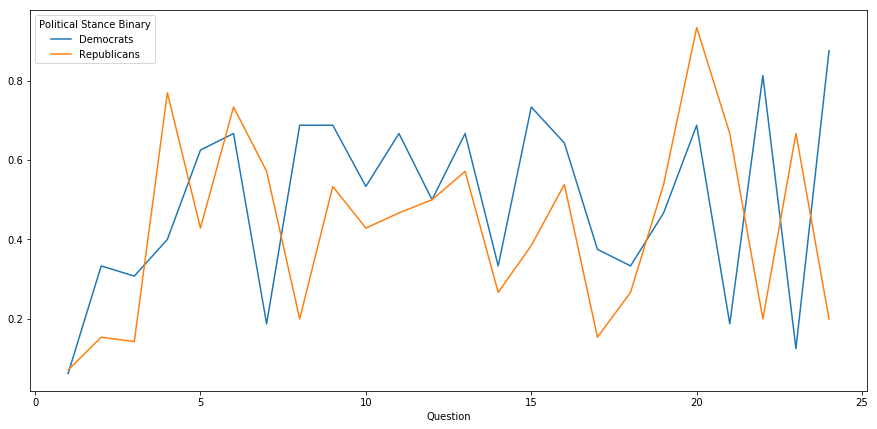

In [6]:
# Construct fully wide dataframe with binarized political stance variable
df_pol = df_responses_full.groupby(['Question', 'Political Stance Binary']).mean()
df_pol = df_pol.drop(["World","Turn"], axis=1)

df_pol_response = df_pol.drop(["Party Predict"], axis=1)
print("Responses by Question by Group:\n", df_pol_response,'\n\n')

df_pol_partypredict = df_pol.drop(["Response"], axis=1)
print("Patry Predictions by Question by Group:\n", df_pol_partypredict, '\n\n')


fig, ax = plt.subplots(figsize=(15,7))
df_pol.groupby(['Question','Political Stance Binary']).mean()['Response'].unstack().plot(ax=ax)

## Data carpentry

In [32]:
# print user-question data in wide format
#df_responses = df_responses.sort_values(['Name'], ascending=[1])
df_responses_full2 = df_responses_full.pivot(index='Name', columns='Question', values='Response')
df_users2 = df_users.set_index('Name').join(df_responses_full2).sort_values('Turn')
df_users2

,Turn,Political Stance,Session,Question Order,World,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
Name,,,,,,,,,,,,,,,,,,,,,
A19L8SNH73AX1Z,1,Republicans,5b8b4044824d7,"23,24,14,6,2,18,21,13,12,8,3,5,20,15,7,4,22,1,...",2,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
AEO8NL8D28NQG,2,strong Democrats,5b8b4d86a9b32,"23,24,2,4,18,7,21,10,8,9,3,14,17,6,12,11,22,19...",2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
A3302168IZJTMX,3,Democrats,5b8b568322aea,"23,24,3,7,20,9,21,17,6,16,12,10,1,8,19,4,22,5,...",2,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
A2A14Q1JLWW6R1,4,strong Democrats,5b8b7fcb9fc24,"23,24,20,17,10,12,21,5,9,14,6,15,13,8,16,3,22,...",2,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A10G0V9R0U5OR,5,Democrats,5b8b863661d5f,"23,24,2,18,12,20,21,7,3,19,8,15,6,13,14,5,22,9...",2,0.0,1.0,0.0,0.0,1.0,...,1.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
A1DNJ17PE2RYJZ,6,strong Democrats,5b8e7e835809d,"23,24,7,5,11,18,21,9,1,6,20,10,14,2,16,15,22,3...",2,0.0,1.0,1.0,NaN,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
A2EZNZ6X58RTNR,7,strong Republicans,5b8ea5bc5b8b2,"23,24,4,7,19,12,21,5,13,14,18,17,9,1,11,3,22,2...",2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2EKR2ZFO10VMV,8,strong Democrats,5b8eb41f294fa,"23,24,12,8,3,17,21,6,16,7,10,11,18,2,9,1,22,20...",2,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
A1CA46R2A6TV9W,9,Democrats,5b8eb7d8c8f49,"23,24,12,3,17,15,21,2,20,18,13,16,10,19,8,4,22...",2,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## Write out and save data

In [33]:
# write out and save user-question data to .csv
df_users2.to_csv('pilot_data.csv')